# Communicate-Data-Findings-Ford-GoBike-System
## by Mohamed Abdelkader

## Investigation Overview

> Explore data and Understand how it correlate each other and bring best out of it ..

## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area..
>  Bay Wheels is a regional public bicycle sharing system in California's San Francisco Bay Area. 
It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. <br>
> In June 2017 the system was officially re-launched as Ford GoBike in a partnership with Ford Motor Company. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df= pd.read_csv('201902-fordgobike-tripdata.csv')

## (Visualization 1)

> most of bike users are around 30 and the more old age the less users ..


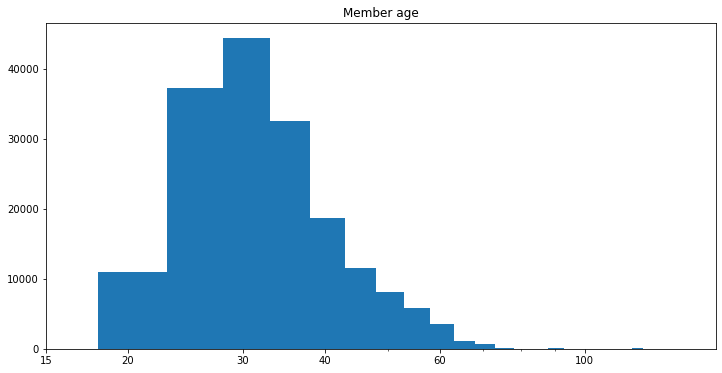

In [3]:
# Adding bins as in Univariant lesson class no 13 Scales and Transformations
# Adding ticks 
df['Age'] = 2019 - df.member_birth_year
bin_size = 5
bins = np.arange(df.Age.min(),df.Age.max() + bin_size, bin_size)
ticks = [15,20,30,40,60,100]
labels = ['{}'.format(v) for v in ticks]
plt.figure(figsize=(12,6))
plt.hist(df['Age'],bins = bins);
plt.title('Member age');
plt.xscale('log');
# as we see it became more normalized
plt.xticks(ticks, labels);
# now figure became much better visualizing 

## (Visualization 2)

> it's max used in Thursday and least at weekend (SAT AND SUN).

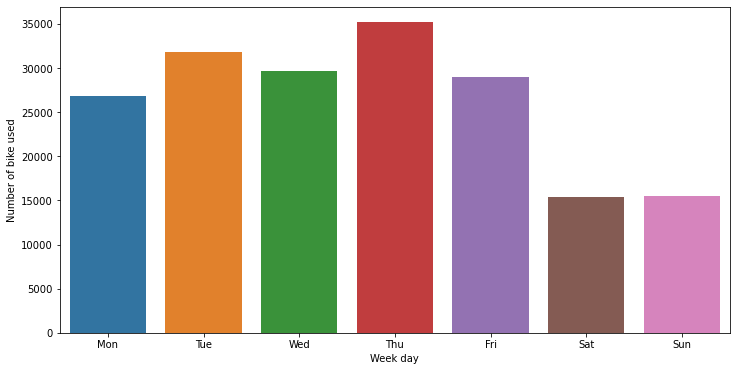

In [4]:
# seaborn.countplot Show the counts of observations in each categorical bin using bars
# Change data type start_time end_time from object to datetime.
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
# change duration_sec to duration in minutes to be like daily used data by people
df['duration_sec'] = df['duration_sec']/60
df.rename(columns= {"duration_sec":"duration_min"}, inplace = True ) 
df['start_month']=df['start_time'].dt.strftime('%B')
df['start_Weak_day']=df['start_time'].dt.strftime('%a')
df['start_hour']=df['start_time'].dt.hour
df['day_of_month']=df['start_time'].dt.strftime('%d')
daysofweak=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.figure(figsize=(12,6))
sb.countplot(data=df, x='start_Weak_day',order=daysofweak);
plt.xlabel('Week day');
plt.ylabel('Number of bike used');

## (Visualization 3)

> it's peak of using is at the early morning at 8 am where people foing to schools and work etc.. and at 5 pm while returing homes .. <br>
> And ofc rarely used at night and early morning and average using is in day time between 8 am and 5 pm.

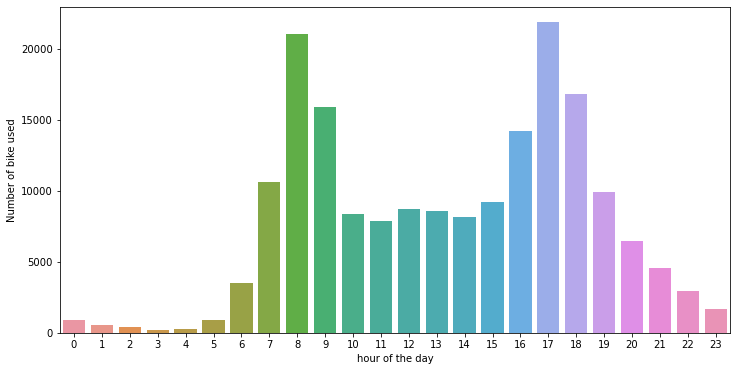

In [5]:
plt.figure(figsize=(12,6))
sb.countplot(data=df, x='start_hour');
plt.xlabel('hour of the day');
plt.ylabel('Number of bike used');

## (Visualization 4)

> as we see Males always have higher durations and thirties ages are the longest time users.

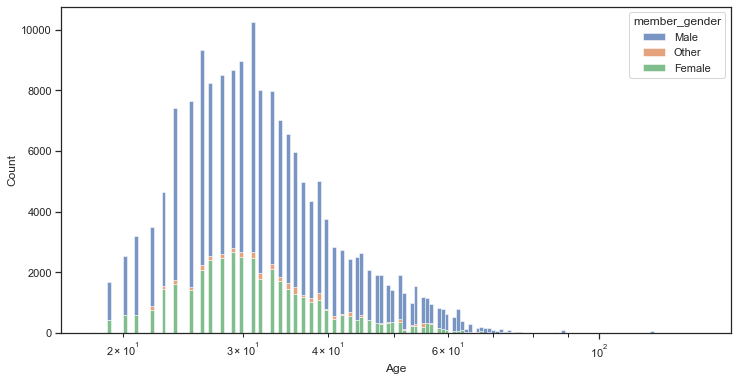

In [6]:
# as in this examble https://seaborn.pydata.org/examples/histogram_stacked.html
plt.figure(figsize=(12,6));
sb.set_theme(style="ticks")
sb.histplot(
    df,
    x="Age", hue="member_gender",
    multiple="stack",
    linewidth=.5,
    log_scale=True,
);

# (Visualization 5)
> we see that start station and end station IDs are highly correlated then maybe we can search about relation between them .<br>
> most users of first 150 stations users ending at the same 150 stations.<br>
> while stations starting from ID 150 to 270 ending at the same period of stations.<br>
> we can say that that these groups of stations are in cities and have long high way between them .. <br>

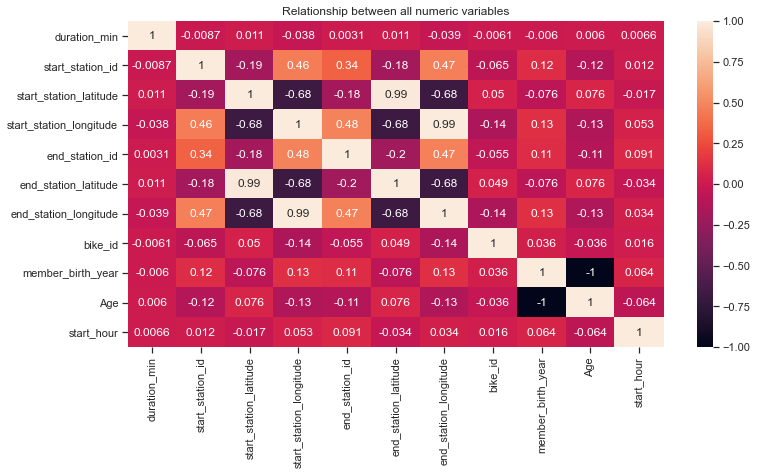

In [7]:
# while searching for new features which related or linked (correlated) we can make a heat map to dataframe.
# first we should make dataframe.corr() where is used to find the pairwise correlation of all columns in the dataframe.
# also df.corr() returns the 2D array required by heatmap and we add annot = True to show correlation values on every cell.
plt.figure(figsize=(12,6))
sb.heatmap(df.corr(),  annot = True)
plt.title('Relationship between all numeric variables');

Text(0, 0.5, 'End')

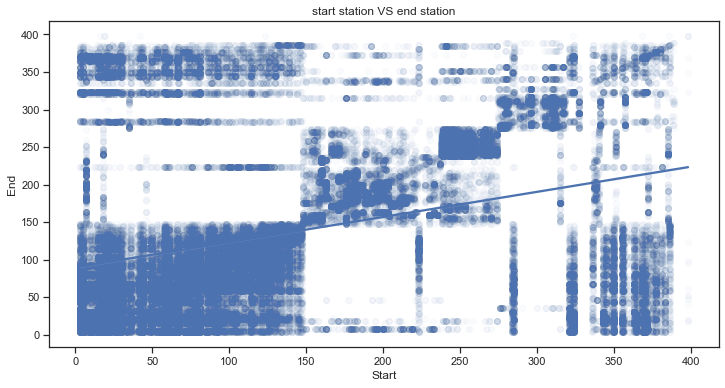

In [8]:
# after adding Jitter and transparenc as required
plt.figure(figsize=(12,6))
sb.regplot(data = df, x = 'start_station_id', y = 'end_station_id', x_jitter =0.2, scatter_kws = {'alpha' : 1/40})
plt.title("start station VS end station")
plt.xlabel('Start')
plt.ylabel('End')

## Summary of Findings

- most of bike users are around 30 and the more old age the less users ..
- t's max used in Thursday and least at weekend (SAT AND SUN).
- it's peak of using is at the early morning at 8 am where people foing to schools and work etc.. and at 5 pm while returing homes .. 
- And ofc rarely used at night and early morning and average using is in day time between 8 am and 5 pm.
- as we see Males always have higher durations and thirties ages are the longest time users.


# Refrences
- https://datascienceplus.com/exploring-san-francisco-bay-areas-bike-share-system/
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.strftime.html
- https://stackoverflow.com/questions/37710397/python-datetime-weekday-strftime-vs-weekday
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.hour.html
- https://seaborn.pydata.org/generated/seaborn.countplot.html
- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4120293/
- https://seaborn.pydata.org/generated/seaborn.heatmap.html
- https://www.geeksforgeeks.org/python-pandas-dataframe-corr/
- https://seaborn.pydata.org/examples/grouped_barplot.html
- https://seaborn.pydata.org/generated/seaborn.catplot.html
- https://julienbeaulieu.gitbook.io/wiki/sciences/programming/data-analysis/data-visualization/bivariate-exploration-of-data/overplotting-transparency-and-jitter

In [ ]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 742060 bytes to slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/slide_deck_template.slides.html
Use Control-C to stop this server
